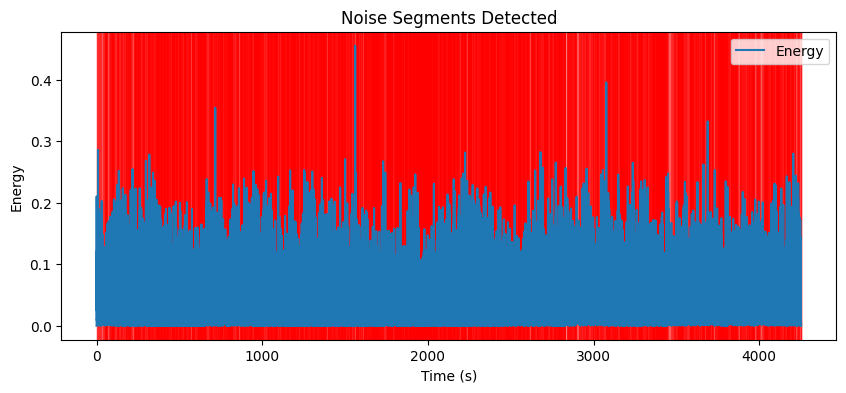

✅ Noise removed audio saved to cleaned_audio.wav


In [2]:
import librosa
import numpy as np
#import noisereduce as nr
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def detect_noise_segments(audio_path, threshold=0.02, min_duration=0.1):
    """
    Detect noise segments based on energy threshold.
    """
    y, sr = librosa.load(audio_path, sr=22050)
    
    # Compute short-time energy
    frame_length = 2048
    hop_length = 512
    energy = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
    
    # Find segments where energy is below threshold
    mask = energy < threshold
    
    # Find start and end of noise segments
    indices = np.where(mask)[0]
    segments = []
    if len(indices) > 0:
        start_idx = indices[0]
        for i in range(1, len(indices)):
            if indices[i] - indices[i-1] > 1:
                end_idx = indices[i-1]
                segments.append((start_idx, end_idx))
                start_idx = indices[i]
        segments.append((start_idx, indices[-1]))

    # Convert to time
    segments_time = [(start * hop_length / sr, end * hop_length / sr) for start, end in segments if ((end - start) * hop_length / sr) >= min_duration]

    # Plot energy with noise segments
    plt.figure(figsize=(10, 4))
    plt.plot(np.linspace(0, len(y) / sr, len(energy)), energy, label="Energy")
    for seg in segments_time:
        plt.axvspan(seg[0], seg[1], color='red', alpha=0.5)
    plt.title("Noise Segments Detected")
    plt.xlabel("Time (s)")
    plt.ylabel("Energy")
    plt.legend()
    plt.show()

    return segments_time

def remove_noise(audio_path, output_path, noise_segments):
    """
    Remove detected noise segments from audio.
    """
    y, sr = librosa.load(audio_path, sr=22050)
    
    mask = np.ones(len(y), dtype=bool)
    for start, end in noise_segments:
        mask[int(start * sr):int(end * sr)] = False

    y_clean = y[mask]
    sf.write(output_path, y_clean, sr)
    print(f"✅ Noise removed audio saved to {output_path}")

# Example usage:
audio_file = "org.wav"
noise_segments = detect_noise_segments(audio_file, threshold=0.015, min_duration=0.1)
remove_noise(audio_file, "cleaned_audio.wav", noise_segments)


In [3]:
import csv

def check_csv_length(file_path, max_length=253):
    with open(file_path, 'r', encoding='utf-8') as f:
        reader = csv.reader(f, delimiter='|')
        exceed_count=0
        for idx, row in enumerate(reader):
            if len(row) < 3:
                print(f"⚠️ Row {idx+1} has fewer columns than expected: {row}")
                continue

            text_length = len(row[1])
            if text_length > max_length:
                print(f"🚨 Row {idx+1} exceeds {max_length} characters with {text_length} chars.")
                print(f"   Content: {row[1][:100]}... (truncated)\n")
                exceed_count += 1
        print(exceed_count)
file_path = 'audio_dataset/metadata.csv'
check_csv_length(file_path)


0


In [2]:
len( "Die Module bestehen wiederum aus weiteren Unterkomponenten,  beispielsweise einem Head, also dem oberen Teil, und einem Body, also dem unteren Teil. ")

149